![alt text](task.PNG "Задание")

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.misc import derivative

%matplotlib inline

In [3]:
class DiffEq:
    def __init__(self, func, exact_solution, epsilon = 0.001):
        self.x0 = 1.0
        self.t0 = 0.0
        self.func = func # lambda x, t: -x
        self.exact_sol = exact_solution # lambda x: np.exp(-x)
        self.epsilon = 0.001
class DiffEqSolver:
    def __init__(self, diff_eq: DiffEq, dt, x_n):
        self.diff_eq = diff_eq
        self.dt = dt
        self.x_n = x_n
    def solve(self, end: float) -> list():
        result = list()

        x = self.diff_eq.x0
        t = self.diff_eq.t0
        steps = int(np.round((end - t) / self.dt) + 1) 

        for i in range(steps):
            if t > (end + self.diff_eq.epsilon):
                break
            result.append((t, x))
            x = self.x_n(x, t, self.dt, self.diff_eq)
            t += self.dt
        return result
    def next(self, t: float, x: float):
        return self.x_n(x, t, self.dt, self.diff_eq)

In [4]:
# Задаём задачу Коши
koshi = DiffEq(lambda t, x: -x, lambda x: np.exp(-x))

In [5]:
# Решатель методом Эйлера. Лямбда имеет вид y(i)=y(i-1)+h*f(x(i-1),y(i-1))), где x(t)==y(x), а i - индекс точки
eulerSolver = DiffEqSolver(koshi, 0.1, lambda x, t, dt, deq: x + dt * deq.func(t, x))
# Решатель методом Рунге-Кутты 2-го порядка
runge_kuttaSolver = DiffEqSolver(koshi, 0.1, lambda x, t, dt, deq: x + dt * deq.func(t + dt * 0.5 , x + dt  * 0.5 * deq.func(t, x)))
# Решатель классическим методом Рунге-Кутты 4-го порядка
runge_kutta_classicSolver = DiffEqSolver(koshi, 0.1, lambda x, t, dt, deq: x + dt/6. * (deq.func(t, x) + 2 * deq.func(t + dt * 0.5,  x + dt * 0.5 * deq.func(t, x)) \
                                                                            + 2 * deq.func(t + dt * 0.5, x + dt * 0.5 *deq.func(t + dt * 0.5,  x + dt * 0.5 * deq.func(t, x))) + deq.func(t + dt, x + dt*deq.func(t + dt * 0.5, x + dt * 0.5 *deq.func(t + dt * 0.5,  x + dt * 0.5 * deq.func(t, x))))))

In [6]:
def showSolution(solver, name):
    points = solver.solve(5.0)
    x = list()
    y = list()
    for i in range(len(points)):
       x.append(points[i][0])
       y.append(points[i][1])
    error = list()
    for i in range(len(y)):
       error.append(np.abs(y[i]-solver.diff_eq.exact_sol(x[i])))
    plt.rcParams['figure.figsize'] = [11, 5]
    fig, ax = plt.subplots()
    plt.title("Решение методом "+name)
    ax.plot(x, y)
    plt.rcParams['figure.figsize'] = [11, 5]
    fig, ax = plt.subplots()
    plt.title('Погрешность метода')
    ax.plot(error)

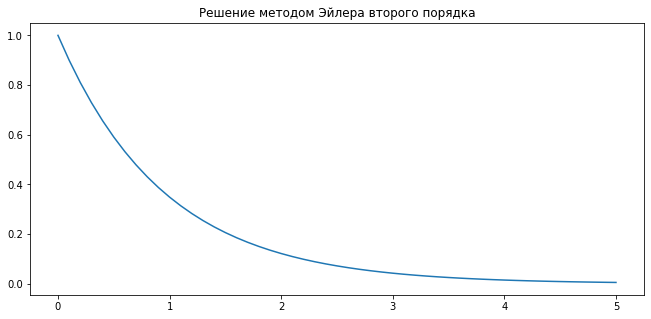

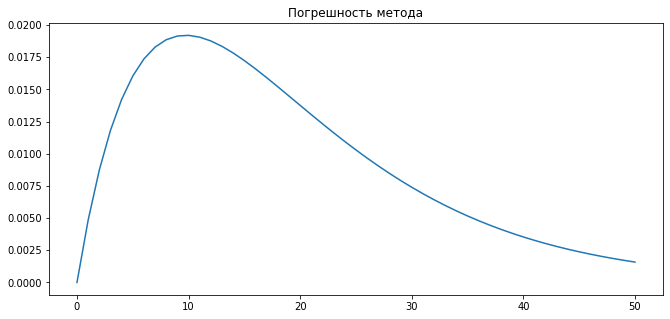

In [7]:
showSolution(eulerSolver, str("Эйлера второго порядка"))

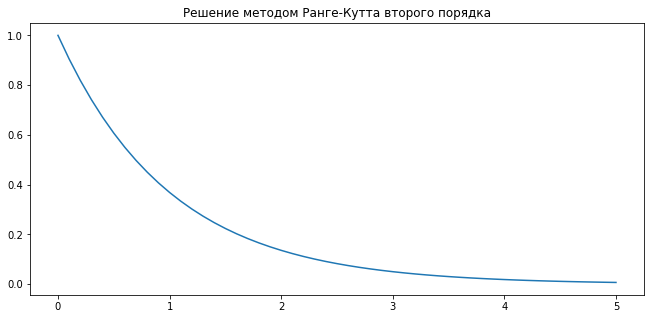

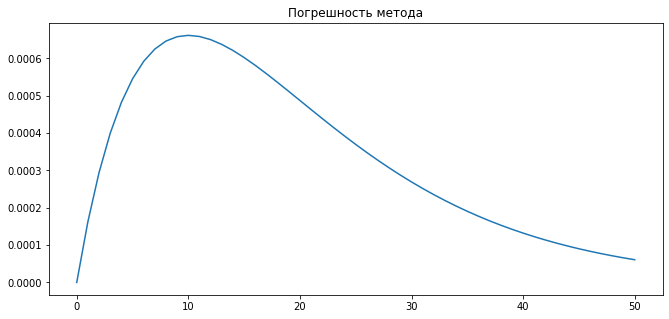

In [8]:
showSolution(runge_kuttaSolver, "Ранге-Кутта второго порядка")

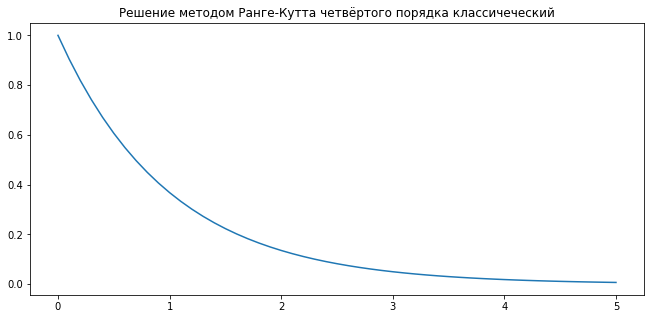

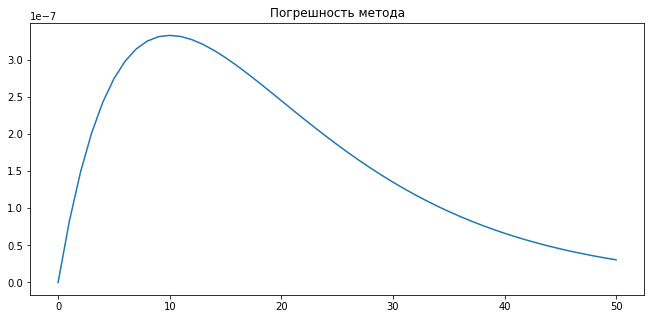

In [9]:
showSolution(runge_kutta_classicSolver, "Ранге-Кутта четвёртого порядка классичеческий")